In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
data=pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
(data.isnull().sum()/len(data))*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.drop('Country',axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_columns = encoder.fit_transform(data[['Status']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Status']))
encoded_df.index = data.index
data_encoded = pd.concat([data.drop(columns=['Status']), encoded_df], axis=1)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
data_encoded.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
imputer2=imputer = KNNImputer()
for i in data_encoded.columns:
        if (data_encoded[i].isnull().sum()/len(data_encoded))*100>5:
            data_encoded[i]=imputer2.fit_transform(data_encoded[[i]])
        else:
            data_encoded[i]=imputer1.fit_transform(data_encoded[[i]])

In [9]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   float64
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   float64
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   float64
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   float64
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [10]:
data_encoded.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1.0
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1.0
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1.0
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.0
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.0


In [11]:
data_encoded.drop_duplicates(inplace=True)

In [21]:
data_encoded['Status_Developing'].describe()

count    2938.000000
mean        0.825732
std         0.379405
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Status_Developing, dtype: float64

In [12]:
Q1 = data_encoded.quantile(0.25)
Q3 = data_encoded.quantile(0.75)

IQR = Q3 - Q1

new = data_encoded[
  ~((data_encoded < (Q1 - 1.5 * IQR)) | (data_encoded> (Q3 + 1.5 * IQR))).any(axis=1)
]

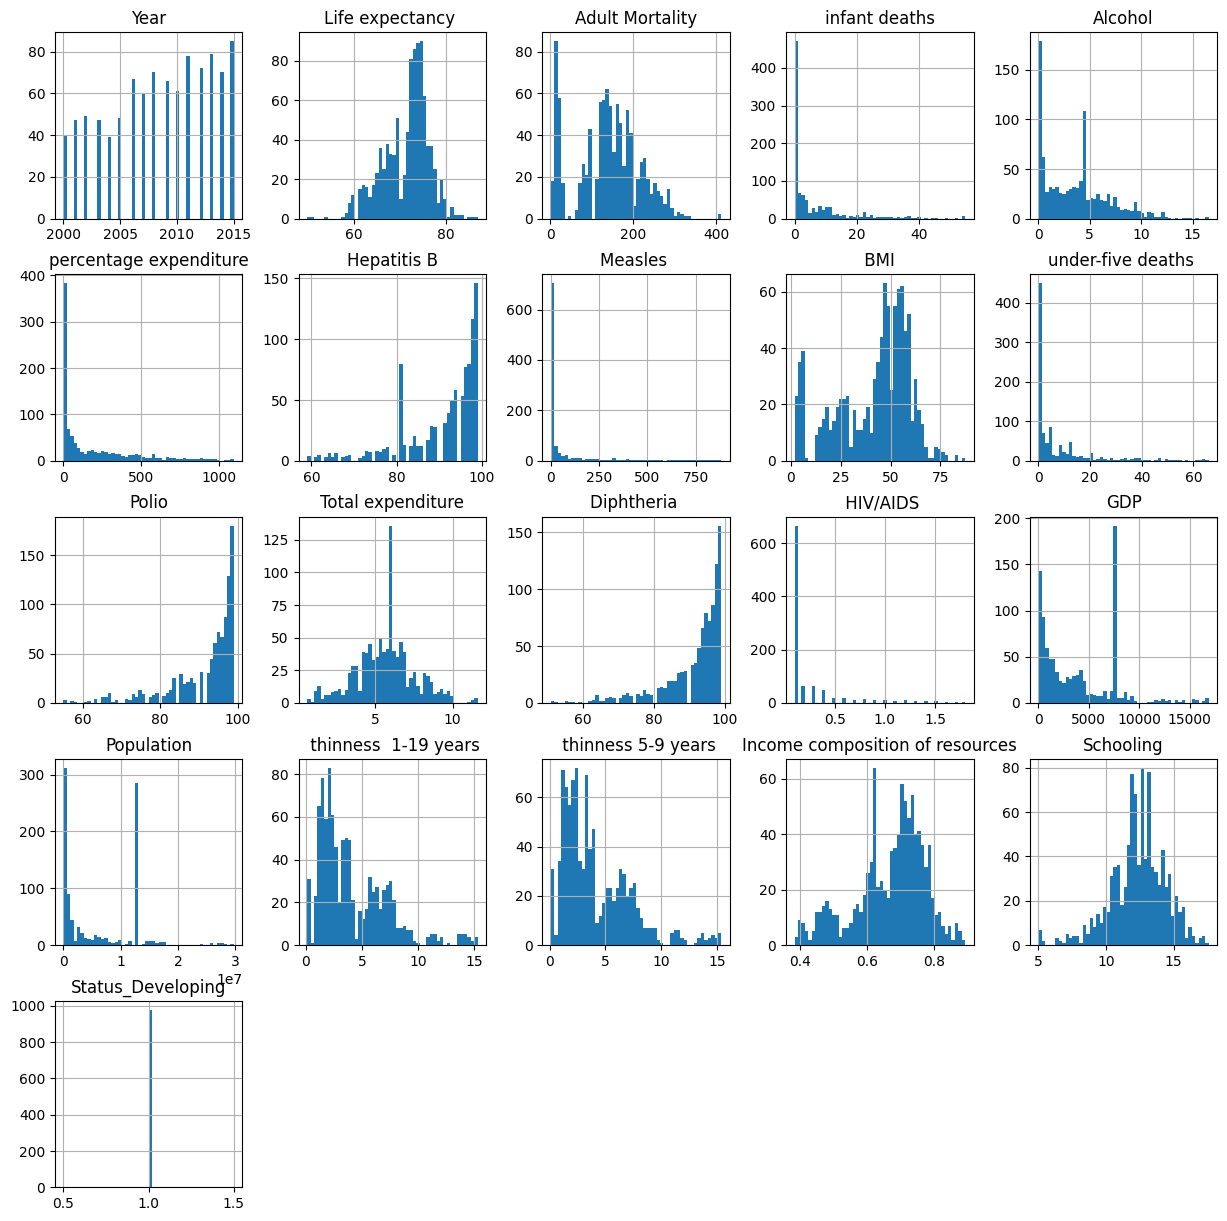

In [13]:
new.hist(bins=50,figsize=(15,15))
plt.show()

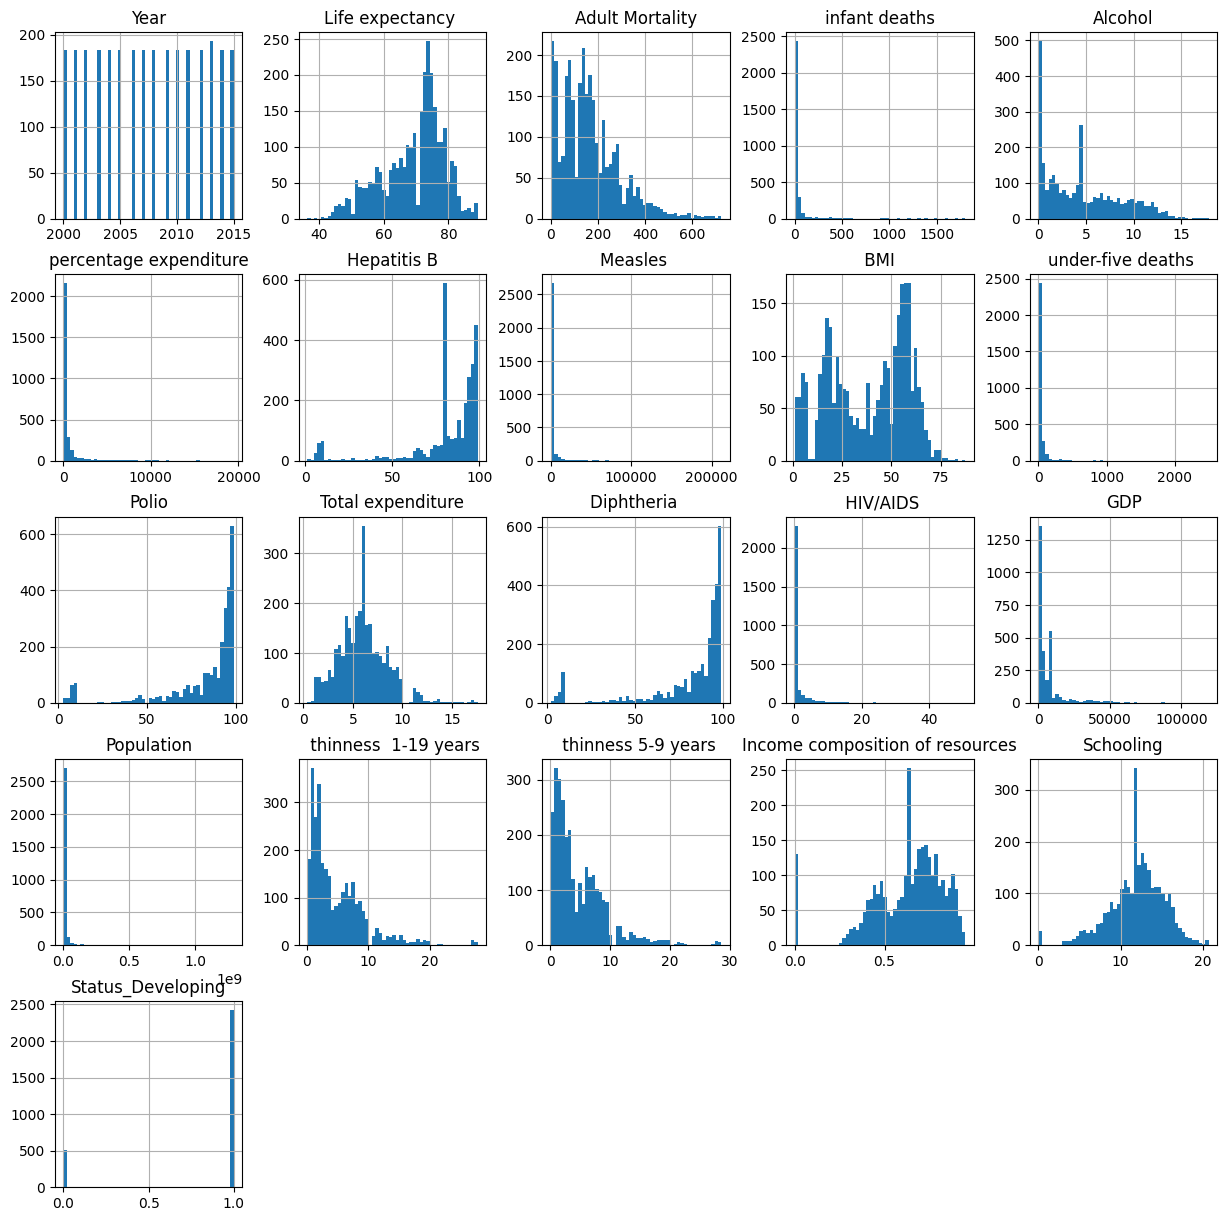

In [16]:
data_encoded.hist(bins=50,figsize=(15,15))
plt.show()

In [19]:
new['Status_Developing'].describe()

count    978.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Status_Developing, dtype: float64

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_encoded[['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling','Status_Developing']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,276.713126,Year
1,299.281450,Life expectancy
2,5.842317,Adult Mortality
3,197.484025,infant deaths
4,4.368076,Alcohol
5,5.731110,percentage expenditure
6,19.469489,Hepatitis B
7,1.442027,Measles
8,8.344530,BMI
9,197.237037,under-five deaths


In [ ]:
from sklearn.model_selection import train_test_split
labels=data_encoded['Life expectancy ']
split=data_encoded.drop('Life expectancy ',axis=1,inplace=False)
X_tr, X_ts, y_tr, y_ts = train_test_split(split, labels, test_size=0.2, random_state=42)

print("X_train:", X_tr.shape)
print("y_train:", y_tr.shape)
print("X_test:", X_ts.shape)
print("y_test:", y_ts.shape)
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_tr)
X_test_scaled = scaler_X.transform(X_ts)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_tr.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_ts.values.reshape(-1, 1))


In [73]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train_scaled, X_with_constant).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     524.2
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:57:02   Log-Likelihood:                -1331.2
No. Observations:                2350   AIC:                             2704.
Df Residuals:                    2329   BIC:                             2825.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.59e-16      0.009  -8.59e-14      1.0

In [14]:
cols=['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing']

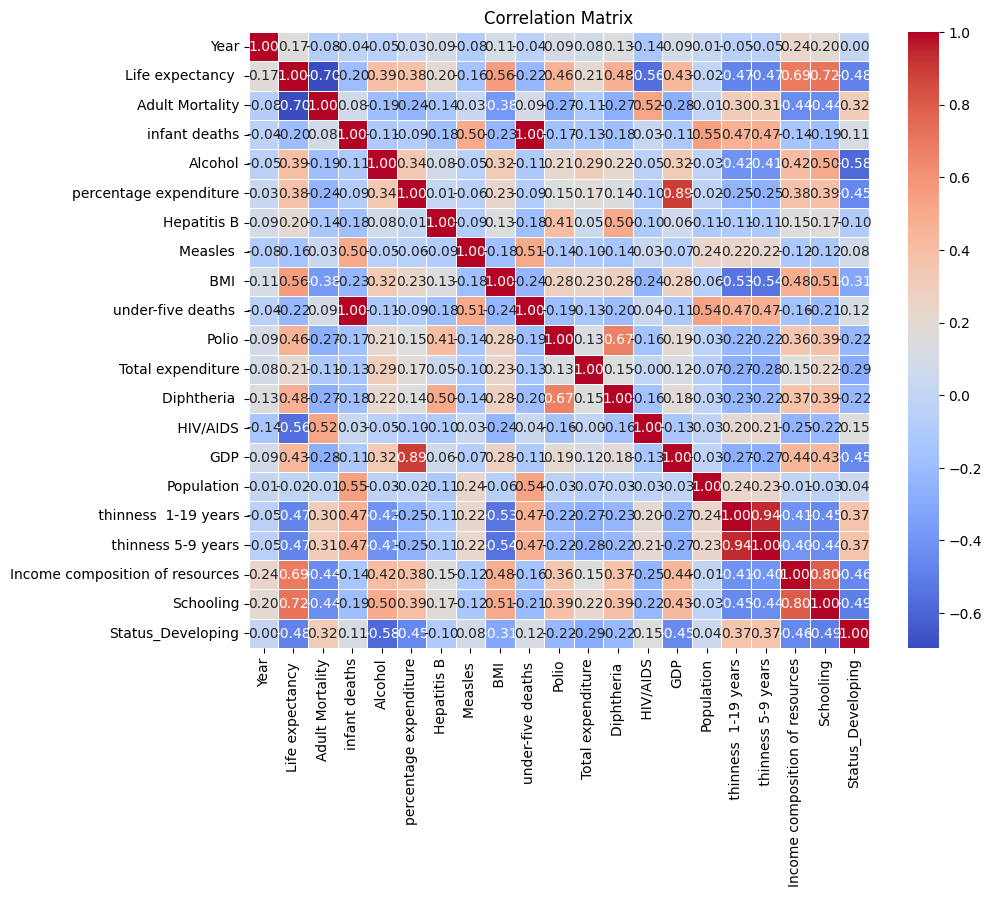

In [25]:
corr_matrix = data_encoded[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
a=data_encoded.drop(['Year',' thinness 5-9 years'],axis=1)

In [80]:
a.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Status_Developing'],
      dtype='object')

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = a[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling', 'Status_Developing']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,85.449905,Life expectancy
1,4.290491,Adult Mortality
2,183.636443,infant deaths
3,4.365424,Alcohol
4,5.730463,percentage expenditure
5,18.771785,Hepatitis B
6,1.433410,Measles
7,8.202718,BMI
8,183.071853,under-five deaths
9,26.625885,Polio


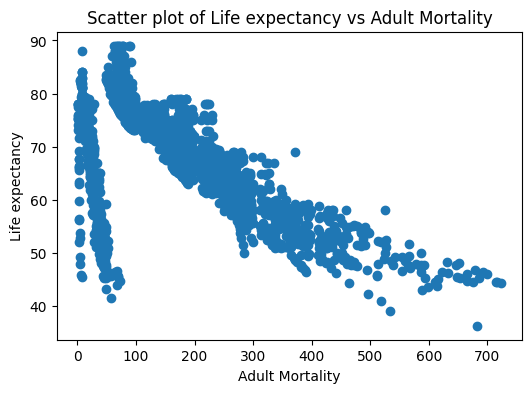

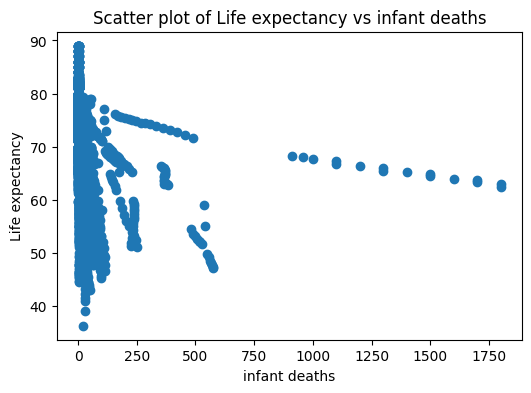

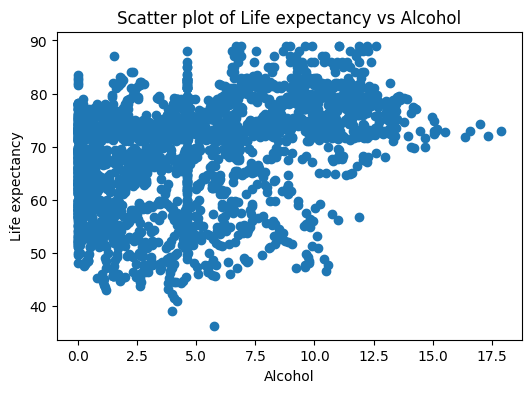

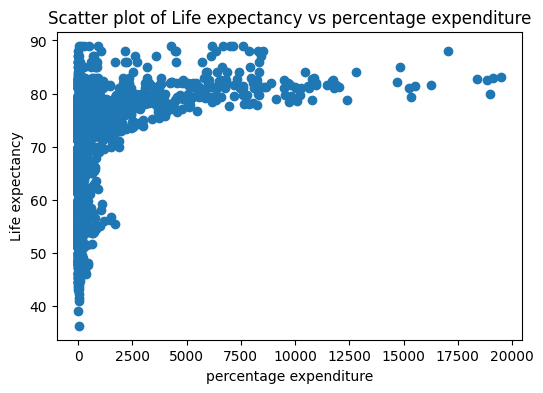

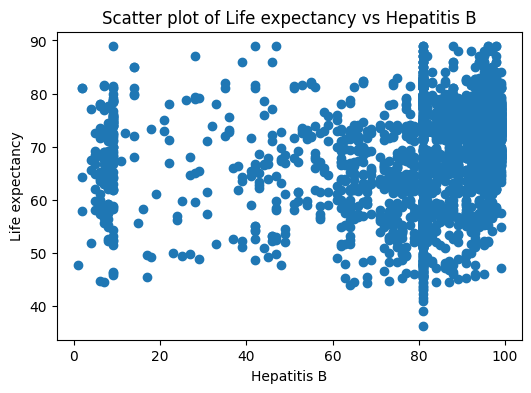

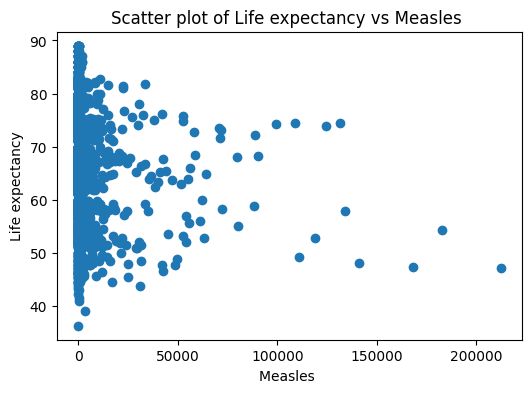

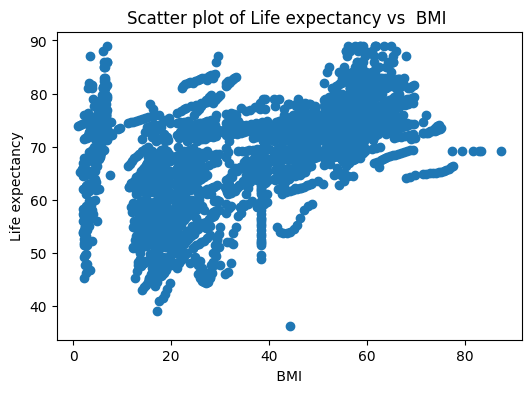

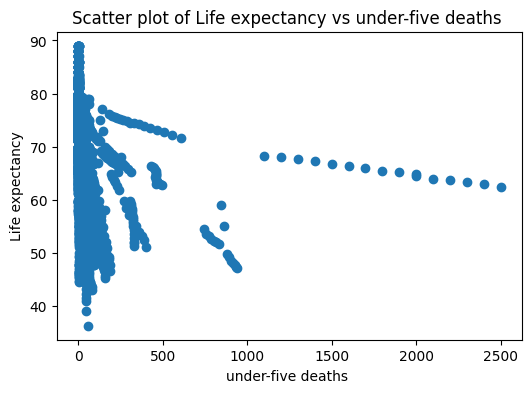

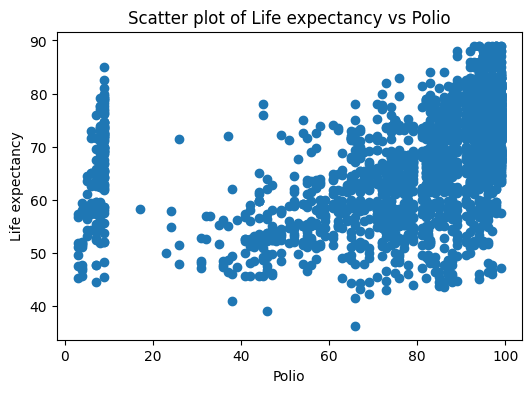

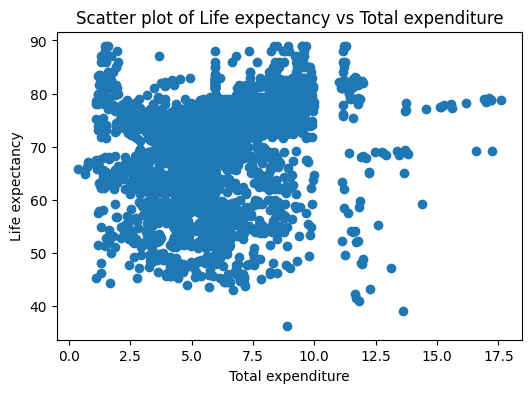

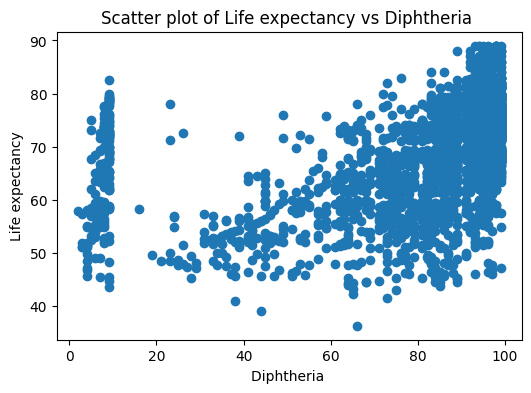

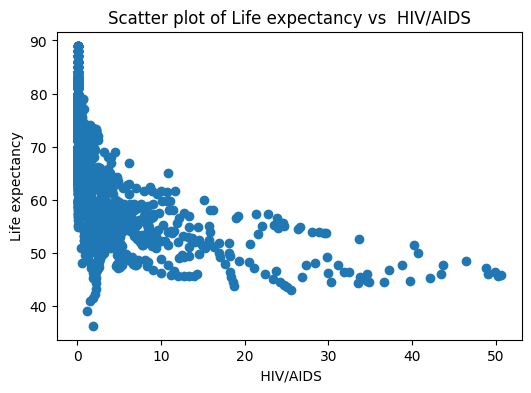

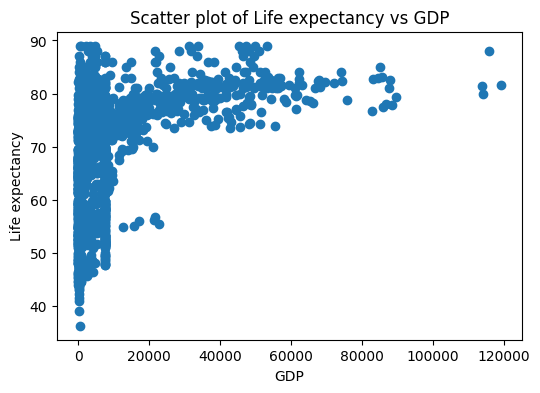

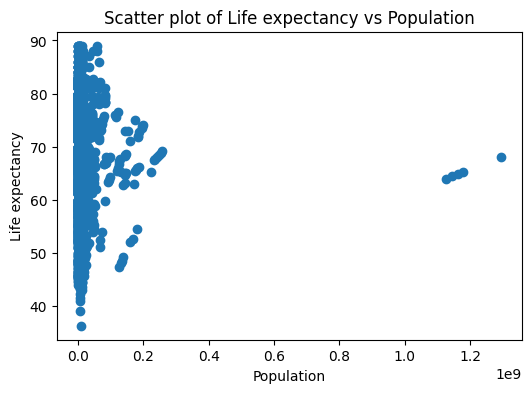

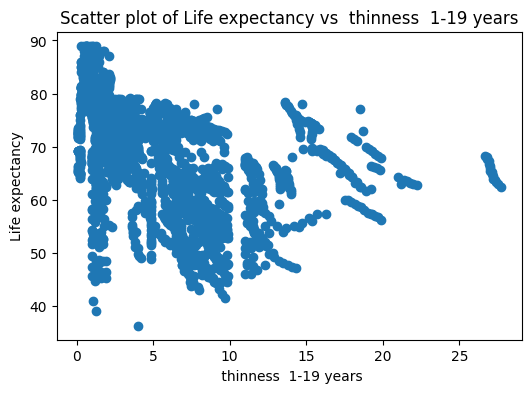

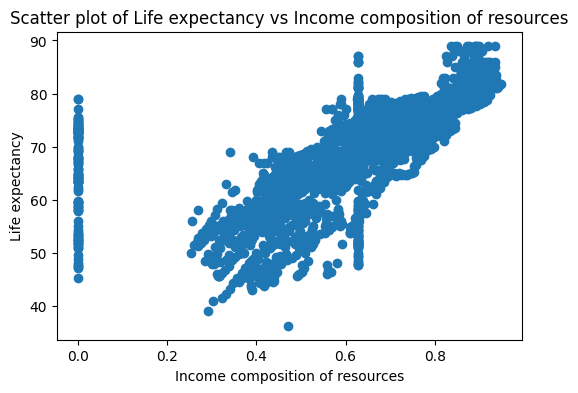

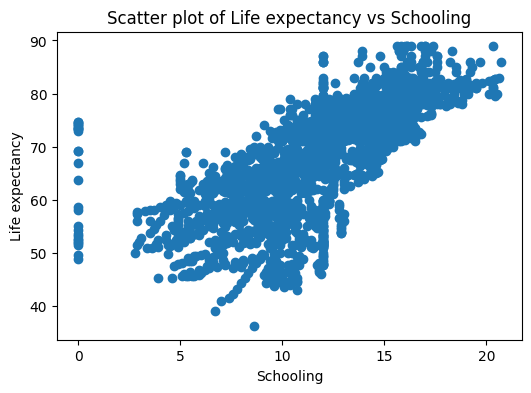

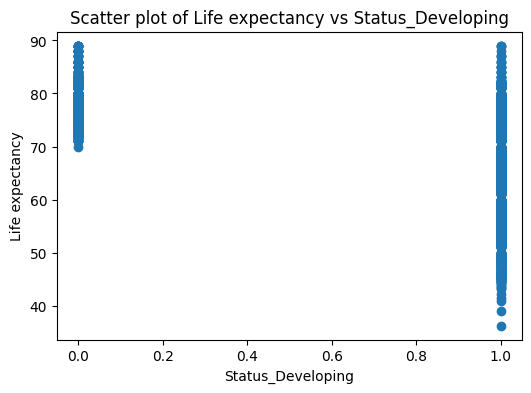

In [98]:
for i in a.columns:
    if i!='Life expectancy ':
        plt.figure(figsize=(6, 4))
        plt.scatter(a[i], a['Life expectancy '])
        plt.title(f'Scatter plot of Life expectancy vs {i}')
        plt.xlabel(i)
        plt.ylabel('Life expectancy')
        plt.show() 

In [15]:
from sklearn.model_selection import train_test_split
labels=a['Life expectancy ']
split=a.drop('Life expectancy ',axis=1,inplace=False)
X_tr_nm, X_ts_nm, y_tr_nm, y_ts_nm = train_test_split(split, labels, test_size=0.2, random_state=42)

print("X_train:", X_tr_nm.shape)
print("y_train:", y_tr_nm.shape)
print("X_test:", X_ts_nm.shape)
print("y_test:", y_ts_nm.shape)

X_train: (2350, 18)
y_train: (2350,)
X_test: (588, 18)
y_test: (588,)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled_nm = scaler_X.fit_transform(X_tr_nm)
X_test_scaled_nm = scaler_X.transform(X_ts_nm)
scaler_y = StandardScaler()
y_train_scaled_nm = scaler_y.fit_transform(y_tr_nm.values.reshape(-1, 1))
y_test_scaled_nm= scaler_y.transform(y_ts_nm.values.reshape(-1, 1))


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
lin_reg = LinearRegression()
param_grid = {}
grid_search = GridSearchCV(lin_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)
model = grid_search.best_estimator_
y_pred = model.predict(X_test_scaled_nm )

Best Parameters: {}


In [103]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.29902654175884674
Mean Squared Error: 0.16690741529820793
Root Mean Squared Error: 0.4085430397133305
R-squared: 0.8241365674099542


In [ ]:
#checking assumption of homoscedasticity for linear regression
residuals = y_test_scaled_nm - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [110]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
param_grid = {'alpha': [0.1, 0.2, 0.01,0.001]}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)
ridge_model = grid_search.best_estimator_
y_pred = ridge_model.predict(X_test_scaled_nm)

Best Parameters: {'alpha': 0.001}


In [111]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.2990265762660195
Mean Squared Error: 0.16690772299275838
Root Mean Squared Error: 0.40854341628859764
R-squared: 0.8241362432049467


In [112]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
param_grid = {'alpha': [0.1, 0.2, 0.01,0.001]}
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)
lasso_model = grid_search.best_estimator_
y_pred = lasso_model.predict(X_test_scaled_nm)

Best Parameters: {'alpha': 0.001}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e-01, tolerance: 1.894e-01
  model = cd_fast.enet_coordinate_descent(


In [113]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.29973310677622517
Mean Squared Error: 0.16824470565148228
Root Mean Squared Error: 0.41017643234525586
R-squared: 0.8227275199360826


In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': [2, 3, 4]}
grid_search = GridSearchCV(poly_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_train_scaled_nm)
# X_test_poly = poly.transform(X_test_scaled_nm)
poly_model = grid_search.best_estimator_
y_pred = poly_model.predict(X_test_scaled_nm)


Best Parameters: {'polynomialfeatures__degree': 2}


In [115]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.205720157835032
Mean Squared Error: 0.08761748262568632
Root Mean Squared Error: 0.2960025044246861
R-squared: 0.907681086415953


In [117]:
from sklearn.svm import SVR
svr_reg =  SVR()
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(svr_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)
svr_model = grid_search.best_estimator_
y_pred = svr_model.predict(X_test_scaled_nm)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'C': 10, 'gamma': 0.1}


In [118]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.17255348791256223
Mean Squared Error: 0.06468187211502457
Root Mean Squared Error: 0.25432631030828207
R-squared: 0.9318473895472233


In [119]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
param_grid = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(tree_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)
tree_model = grid_search.best_estimator_
y_pred = tree_model.predict(X_test_scaled_nm)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5}


In [120]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.17637338996973786
Mean Squared Error: 0.07170984250468532
Root Mean Squared Error: 0.26778693490289124
R-squared: 0.9244423081453055


In [124]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300], 'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)], 'min_samples_split': [2, 5, 10],'min_samples_leaf' : [1, 2, 4]}
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled_nm, y_train_scaled_nm)
print("Best Parameters:", grid_search.best_params_)
forest_model = grid_search.best_estimator_
y_pred = forest_model.predict(X_test_scaled_nm)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
mae = mean_absolute_error(y_test_scaled_nm, y_pred)
mse = mean_squared_error(y_test_scaled_nm, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled_nm, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.11202110845378457
Mean Squared Error: 0.029400444136168498
Root Mean Squared Error: 0.17146557711729926
R-squared: 0.9690219693581583
